* <<데이터 요약>>
- 본 내용은 목차의 별표부터 보시면 됩니다
- ★resume 통합 : resume + education + language + certificate
- ★recruitment 통합 : recruitment + company

-  새 피처 생성, 상관관계 분석의 내용은
- 각 목차의 ★통합 파일의 하단 목록에 정리되어 있습니다.

 <img src='https://drive.google.com/uc?export=download&id=13i3z5mphVDwsYv840nPVV8mG8VeqHES6' width="" height ="" /><br>

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import LabelEncoder

!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt

# 나눔 바른고딕 폰트 경로 설정
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = plt.matplotlib.font_manager.FontProperties(fname=fontpath).get_name()

# 한국어 폰트 설정
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# 고해상도 설정
%config InlineBackend.figure_format = 'retina'

In [ ]:
# colab인지 아닌지 신경쓰지 않도록
try:
    from google.colab import drive

    drive.mount('/content/drive')

    csv_path = '/content/drive/MyDrive/dacon/csv'
    result_path='/content/drive/MyDrive/dacon/result'
    print("노트북은 Google Colab에서 실행 중입니다.")

except:
    csv_path = './csv'
    result_path='./result'

    print("노트북은 Google Colab이 아닌 환경에서 실행 중입니다.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
노트북은 Google Colab에서 실행 중입니다.


In [ ]:
# apply_train= pd.read_csv('/content/drive/MyDrive/dev/DACON/1. 국민대/apply_train.csv')
# company= pd.read_csv('/content/drive/MyDrive/dev/DACON/1. 국민대/company.csv')
# recruitment = pd.read_csv('/content/drive/MyDrive/dev/DACON/1. 국민대/recruitment.csv')
# resume = pd.read_csv('/content/drive/MyDrive/dev/DACON/1. 국민대/resume.csv')
# resume_certificate = pd.read_csv('/content/drive/MyDrive/dev/DACON/1. 국민대/resume_certificate.csv')
# resume_education = pd.read_csv('/content/drive/MyDrive/dev/DACON/1. 국민대/resume_education.csv')
# resume_language = pd.read_csv('/content/drive/MyDrive/dev/DACON/1. 국민대/resume_language.csv')
# sample_submission = pd.read_csv('/content/drive/MyDrive/dev/DACON/1. 국민대/sample_submission.csv')

In [ ]:
# apply_train= pd.read_csv('/content/drive/MyDrive/dev/DACON/1. 국민대/apply_train.csv')
# company= pd.read_csv('/content/drive/MyDrive/dev/DACON/1. 국민대/company.csv')
# recruitment = pd.read_csv('/content/drive/MyDrive/dev/DACON/1. 국민대/recruitment.csv')
# resume = pd.read_csv('/content/drive/MyDrive/dev/DACON/1. 국민대/resume.csv')
# resume_certificate = pd.read_csv('/content/drive/MyDrive/dev/DACON/1. 국민대/resume_certificate.csv')
# resume_education = pd.read_csv('/content/drive/MyDrive/dev/DACON/1. 국민대/resume_education.csv')
# resume_language = pd.read_csv('/content/drive/MyDrive/dev/DACON/1. 국민대/resume_language.csv')
# sample_submission = pd.read_csv('/content/drive/MyDrive/dev/DACON/1. 국민대/sample_submission.csv')

In [ ]:
apply_train = pd.read_csv(csv_path +'/apply_train.csv')
resume = pd.read_csv(csv_path +'/resume.csv')
resume_certificate = pd.read_csv(csv_path +'/resume_certificate.csv')
resume_education = pd.read_csv(csv_path +'/resume_education.csv')
resume_language= pd.read_csv(csv_path +'/resume_language.csv')
recruitment = pd.read_csv(csv_path +'/recruitment.csv')
company = pd.read_csv(csv_path +'/company.csv')
sample_submission= pd.read_csv(csv_path +'/sample_submission.csv')

In [ ]:
resume_certificate['certificate_contents'].head(50
                            )

0                   손해보험사
1                 2종운전면허증
2           자동차운전면허 2종 보통
3                운전면허2종보통
4                  메이크업3급
5                ITQ파워포인트
6          MOS 파워포인트 2003
7             패션머천다이징산업기사
8           자동차 운전면허 1종보통
9                ITQ파워포인트
10             GTQ 포토샵 1급
11               운전면허2종보통
12       자동차 운전면허 (2종 보통)
13             전산회계운용사 3급
14               운전면허2종보통
15              컴퓨터활용능력2급
16    MOS POWERPOINT 2007
17         교원자격증 실기교사(한재)
18                컬러리스트기사
19             정보기기 운영기능사
20               운전면허2종보통
21          자동차 운전면허 1종보통
22                2종운전면허증
23       자동차 운전면허 (2종 보통)
24                  미용기능사
25              자동차 운전면허증
26                   중등교사
27             운전면허 1종 보통
28             1종보통 운전면허증
29               운전면허2종보통
30               운전면허2종보통
31       자동차 운전면허 (2종 보통)
32           컴퓨터그래픽스운용기능사
33          자동차 운전면허 1종보통
34              워드프로세서 2급
35           컴퓨터그래픽스운용기능사
36                   실용영어
37          자동차운전면허 2종 자동
38          

# 1. Resume 데이터 전처리
- resume
- resume_education
- resume_language
- resume_certificate

## 1.1 resume 데이터 정리

resume 간단정리

▶reg_date(등록날짜)->결측치 무/ 2000~2020년도까지 다양.일단 등록연도 기준으로 뽑기

▶updated_date(수정날짜)-> 결측치 무/ 모든 데이터가 2020년도.일단 등록월 기준으로 뽑기

▶degree(학력)->결측치 무/ unique 값: 4,3,2,5,6 -> 5개로 구간화

▶graduate_date(졸업년도)->결측치 무/ 년도 분할해서 연령대로 구간화 / 0값인 790행은 우선 최빈값 대체

▶hope_salary(희망연봉)->결측치 무/ 0~10000/ 5개 구간화/ 0값인 5000행 우선 0으로.

▶ last_salary(마지막연봉)->결측치 무/0~10000/5개 구간화/ 0값인 2400행 우선 0으로.

▶ text_keyword(직무키워드)-> 우선 drop /resume_all['job']으로 대체/11개로 분류

▶ job_code_seq1(희망직무)-> 결측치 무/9개로 분류

▶ job_code_seq2,job_code_seq3 -> 결측치 각각 7982,8295 / 모두 drop
세개 열 합쳐서 코드별로 원핫인코딩
-> user_job_code

▶ career_month(경력월)->결측치 무/0~432/resume_all['career']로 대체 /7개로 구간화

▶ career_job_code(경력직무)->결측치 758/주요 경력직무 4개 및 기타

각각의 데이터에서 결측치 비율이 높은 컬럼은 데이터정리 부분 초반에 결측치 제거.

- job_code_seq2,3
- univ_major,univ_sub_major

또한 피처생성에 활용했던??? 정제되어있지 않은 데이터를포함한 컬럼들은 피처생성 마지막부분에 결측치 제거.

- text_keyword
- certificate_contents

★급하게 하다보니 목차 가독성이 떨어지는데, 추후 보완예정이니 참고해서 봐주세요.★

- user 테이블로 복사
- resume_seq 중복 없음, 이걸로 정렬하고 인덱스로 지정

In [ ]:
user = resume.copy()

In [ ]:
user.resume_seq.duplicated().sum()

0

In [ ]:
# 인덱스 설정
user.set_index('resume_seq', inplace=True)
user.sort_index(inplace=True)
user

,reg_date,updated_date,degree,graduate_date,hope_salary,last_salary,text_keyword,job_code_seq1,job_code_seq2,job_code_seq3,career_month,career_job_code
resume_seq,,,,,,,,,,,,
U00001,2019-12-27,2020-02-01,4,2009,1500.0,1500.0,디자이너,재료·화학·섬유·의복,NaN,NaN,0,NaN
U00002,2020-04-24,2020-04-29,4,2005,0.0,0.0,디자이너,재료·화학·섬유·의복,NaN,NaN,73,기타 공공;개인서비스
U00003,2018-02-14,2020-07-08,4,2004,0.0,0.0,남성복디자이너;TD캐주얼,재료·화학·섬유·의복,NaN,NaN,113,섬유;봉제;가방;의류
U00004,2017-10-26,2020-04-27,4,2011,0.0,0.0,상품기획;영업기획,재료·화학·섬유·의복,NaN,NaN,27,섬유;봉제;가방;의류
U00005,2020-03-18,2020-04-08,4,2011,0.0,0.0,인사;총무;경영;MD;상품기획,재료·화학·섬유·의복,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
U08478,2020-02-05,2020-03-31,4,2003,0.0,2700.0,상품기획,재료·화학·섬유·의복,NaN,NaN,60,섬유;봉제;가방;의류
U08479,2016-02-17,2020-07-15,3,0,2500.0,2300.0,디자이너,재료·화학·섬유·의복,NaN,NaN,59,디자인;CAD;설계
U08480,2019-11-13,2020-06-24,4,0,0.0,0.0,VMD;텍스타일디자인;섬유디자인;니트디자인;여성복디자인,디자인,NaN,NaN,0,NaN


결측치 높은 데이터 제거
- job_code_seq2      7982개 결측치
- job_code_seq3      8295개 결측치

### 1.1.1 job_code_seq1,2,3 드롭 대신, 하나로 합쳐서 원핫인코딩
- job code는 각 유저별로 한개에서 세개까지 선택 가능
- 같은 코드를 선택했어도 각기 다른 컬럼에 표시되는 경우 있음

In [ ]:
# Melt the DataFrame to get the desired format
melted_df = user.reset_index().melt(id_vars=['resume_seq'], value_vars=['job_code_seq1', 'job_code_seq2', 'job_code_seq3'],
                     var_name='job_code_seq', value_name='job_code')


# Remove rows with null job_code values and drop the 'job_code_seq' as it's no longer needed
melted_df = melted_df.dropna(subset=['job_code']).drop('job_code_seq', axis=1).reset_index(drop=True)

# Pivot the melted_df to get the desired format with one-hot encoding
user_job_code = melted_df.pivot_table(index='resume_seq',
                                 columns='job_code',
                                 aggfunc=lambda x: 1,  # We just want to mark the existence of the job_code
                                 fill_value=0)


user_job_code

job_code,IT·게임,건설·기계·전기·전자,경영·기획·회계·사무,관광,기술·과학·산업,기타 직종,디자인,문화·예술·신문·방송,여행사,영업·판매·TM,재료·화학·섬유·의복,전문·교육·자격,통신·모바일
resume_seq,,,,,,,,,,,,,
U00001,0,0,0,0,0,0,0,0,0,0,1,0,0
U00002,0,0,0,0,0,0,0,0,0,0,1,0,0
U00003,0,0,0,0,0,0,0,0,0,0,1,0,0
U00004,0,0,0,0,0,0,0,0,0,0,1,0,0
U00005,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
U08478,0,0,0,0,0,0,0,0,0,0,1,0,0
U08479,0,0,0,0,0,0,0,0,0,0,1,0,0
U08480,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
melted_df.set_index('resume_seq',inplace=True)

In [ ]:
melted_df.value_counts()

job_code   
재료·화학·섬유·의복    7426
디자인             628
경영·기획·회계·사무     496
영업·판매·TM        492
전문·교육·자격         57
IT·게임            19
건설·기계·전기·전자      16
문화·예술·신문·방송      13
기타 직종            12
기술·과학·산업          7
관광                1
여행사               1
통신·모바일            1
dtype: int64

## 1.2 resume_education 데이터 정리

- resume_seq
- hischool_type_seq
- hischool_special_type
- hischool_nation
- hischool_gender
- hischool_location_seq
- univ_type_seq1
- univ_type_seq2
- univ_transfer
- univ_location
- univ_major
- univ_sub_major
- univ_major_type
- univ_score

In [ ]:
drop_list = ['univ_major','univ_sub_major','univ_transfer']
resume_education = resume_education.drop(columns=drop_list)

In [ ]:
resume_education.iloc[:,9].value_counts() #8

9     3255
3     1028
4      863
19     714
5      604
0      566
8      424
10     263
20     136
2       89
18      88
7       86
13      62
6       55
14      48
17      41
23      32
11      32
15      29
16      24
12      21
22      14
21       8
Name: univ_major_type, dtype: int64

In [ ]:
#resume_education 데이터 지원자번호 기준 오름차순 정리
resume_education = resume_education.sort_values(by='resume_seq')
resume_education

,resume_seq,hischool_type_seq,hischool_special_type,hischool_nation,hischool_gender,hischool_location_seq,univ_type_seq1,univ_type_seq2,univ_location,univ_major_type,univ_score
5714,U00001,21,일반고,공립,여자학교,4,5,5,17,9,20.0
3375,U00002,0,기타,기타,기타,0,5,5,3,8,90.0
201,U00003,21,일반고,공립,남여공학,6,5,5,17,4,90.0
586,U00004,21,일반고,공립,남여공학,5,5,5,5,3,70.0
7970,U00005,21,일반고,공립,여자학교,5,0,0,0,10,50.0
...,...,...,...,...,...,...,...,...,...,...,...
6923,U08478,21,일반고,공립,남여공학,3,5,5,5,19,0.0
5091,U08479,21,자율고,사립,남여공학,3,3,6,3,9,0.0
2775,U08480,0,기타,기타,기타,0,5,5,10,9,80.0
334,U08481,21,자율고,공립,여자학교,5,5,5,5,9,60.0


## resume_language 데이터 정리

In [ ]:
#resume_language 데이터 지원자번호 기준 오름차순 정리
resume_language = resume_language.sort_values(by='resume_seq')
resume_language.head(30)

,resume_seq,language,exam_name,score
45,U00004,2,11,661.62
701,U00005,2,4,873.74
205,U00039,2,4,848.48
645,U00054,2,4,909.09
769,U00067,2,2,20.00
679,U00069,2,11,944.44
65,U00079,2,4,5.56
796,U00080,2,4,959.60
637,U00087,2,4,969.70
106,U00097,2,4,500.00


## drop_duplicates 한다는건, 한 유저가 여러가지 점수 가지고 있을때, 어떻게 처리되는건지?
- 스케일링 안해도 되는지?

In [ ]:
def convert_to_grade(row):
    lang = row['language']
    score = row['score']
    min_score, max_score = 0, 1000  # 범위를 직접 설정
    if lang in [2, 3, 4, 9]:
        if min_score <= score <= max_score:
            if 700 <= score <= 1000:
                return 1
            elif 500 <= score < 700:
                return 2
            elif 0 <= score < 500:
                return 3
    else:                          # 8인 경우만 score 맥스값이 650점대
        if min_score <= score <= max_score:
            if 600 <= score <= 700:
                return 1
            elif 450 <= score < 600:
                return 2
            elif 0 <= score < 450:
                return 3
resume_language['score'] = resume_language.apply(convert_to_grade, axis=1)
#resume_language = resume_language.drop(columns = 'exam_name')
resume_language.sort_values(by='resume_seq', inplace = True)
resume_language= resume_language.drop_duplicates(subset='resume_seq')

In [ ]:
resume_language['lang_exam_score'] = resume_language['language'].astype(str) + ';' + resume_language['exam_name'].astype(str) + ';' + resume_language['score'].astype(str)
# column명과 같이 언어 번호; 시험 번호; 점수 로 설정되어있음
resume_language = resume_language.drop(['language','exam_name', 'score'], axis=1)
resume_language = resume_language.drop_duplicates()   #겹치는 사람 한명 제거(97유저가 같은 영어점수를 2번 기입함)

In [ ]:
resume_language

,resume_seq,lang_exam_score
45,U00004,2;11;2
701,U00005,2;4;1
205,U00039,2;4;1
645,U00054,2;4;1
769,U00067,2;2;3
...,...,...
424,U08443,4;5;2
728,U08461,2;4;2
278,U08465,2;11;3
212,U08472,2;4;2


In [ ]:
resume_language

,resume_seq,lang_exam_score
45,U00004,2;11;2
701,U00005,2;4;1
205,U00039,2;4;1
645,U00054,2;4;1
769,U00067,2;2;3
...,...,...
424,U08443,4;5;2
728,U08461,2;4;2
278,U08465,2;11;3
212,U08472,2;4;2


In [ ]:
# resume_language['score'] = resume_language['score'].str.split(';').str[0].str.extract('(\d+)').astype(int)

## resume_certificate 데이터 정리

In [ ]:
resume_certificate.certificate_contents.str.contains('패션|컬러|양장|비주얼|VM|VISUAL').value_counts()

False    11656
True      1315
Name: certificate_contents, dtype: int64

In [ ]:
#resume_language 데이터 지원자번호 기준 오름차순 정리
resume_certificate = resume_certificate.sort_values(by='resume_seq')
resume_certificate

,resume_seq,certificate_contents
6855,U00002,자동차 운전면허 (2종 보통)
6458,U00003,운전면허2종보통
4424,U00003,컬러리스트 기사
7553,U00003,워드프로세서 1급
1509,U00004,정보처리기능사
...,...,...
6980,U08480,컬러리스트기사
7043,U08480,컴퓨터패션디자인운용마스터
335,U08481,컴퓨터활용능력 2급
7386,U08482,컴퓨터그래픽스운용기능사


## 클래스 개수 너무 많아서 전처리 필요

In [ ]:
# 'certificate_contents' 열의 데이터를 모두 문자열로 변환
resume_certificate['certificate_contents'] = resume_certificate['certificate_contents'].astype(str)

#자격증 데이터 groupby
certificate_grouped = resume_certificate.groupby('resume_seq')['certificate_contents'].apply(lambda x: '/'.join(x)).reset_index()

In [ ]:
certificate_grouped

,resume_seq,certificate_contents
0,U00002,자동차 운전면허 (2종 보통)
1,U00003,운전면허2종보통/컬러리스트 기사/워드프로세서 1급
2,U00004,정보처리기능사/유통관리사 2급/MOS EXCEL 2003 EXPERT
3,U00006,운전면허 1종 보통/문서실무사1급/유통관리사 2급
4,U00007,샵마스터/자동차운전면허1종 보통/패턴 양장 기능사/MICROSOFT OFFICE E...
...,...,...
5971,U08476,운전면허2종보통
5972,U08479,컴퓨터그래픽스운용기능사
5973,U08480,2종 보통 운전면허증/컴퓨터그래픽스운용기능사/컬러리스트기사/컴퓨터패션디자인운용마스터
5974,U08481,컴퓨터활용능력 2급


## ★resume 통합


In [ ]:
# resume 결측치 제거 (text_keyword, career_job_code 결측치 치환 예정)
resume = resume.drop(['job_code_seq2', 'job_code_seq3'], axis=1)
resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8482 entries, 0 to 8481
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resume_seq       8482 non-null   object 
 1   reg_date         8482 non-null   object 
 2   updated_date     8482 non-null   object 
 3   degree           8482 non-null   int64  
 4   graduate_date    8482 non-null   int64  
 5   hope_salary      8482 non-null   float64
 6   last_salary      8482 non-null   float64
 7   text_keyword     8287 non-null   object 
 8   job_code_seq1    8482 non-null   object 
 9   career_month     8482 non-null   int64  
 10  career_job_code  7724 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 729.0+ KB


In [ ]:
#resume 데이터 지원자번호 기준 오름차순 정리
resume = resume.sort_values(by='resume_seq')

In [ ]:
resume_language

,resume_seq,lang_exam_score
45,U00004,2;11;2
701,U00005,2;4;1
205,U00039,2;4;1
645,U00054,2;4;1
769,U00067,2;2;3
...,...,...
424,U08443,4;5;2
728,U08461,2;4;2
278,U08465,2;11;3
212,U08472,2;4;2


In [ ]:
#resume_all로 4개 레쥬메 파일 통합
resume_all = pd.merge(resume, resume_education, on='resume_seq', how='left')
resume_all = pd.merge(resume_all, resume_language, on='resume_seq', how='left')
resume_all = pd.merge(resume_all, certificate_grouped, on='resume_seq', how='left')

resume_all.head(10)

,resume_seq,reg_date,updated_date,degree,graduate_date,hope_salary,last_salary,text_keyword,job_code_seq1,career_month,...,hischool_nation,hischool_gender,hischool_location_seq,univ_type_seq1,univ_type_seq2,univ_location,univ_major_type,univ_score,lang_exam_score,certificate_contents
0,U00001,2019-12-27,2020-02-01,4,2009,1500.0,1500.0,디자이너,재료·화학·섬유·의복,0,...,공립,여자학교,4,5,5,17,9,20.0,NaN,NaN
1,U00002,2020-04-24,2020-04-29,4,2005,0.0,0.0,디자이너,재료·화학·섬유·의복,73,...,기타,기타,0,5,5,3,8,90.0,NaN,자동차 운전면허 (2종 보통)
2,U00003,2018-02-14,2020-07-08,4,2004,0.0,0.0,남성복디자이너;TD캐주얼,재료·화학·섬유·의복,113,...,공립,남여공학,6,5,5,17,4,90.0,NaN,운전면허2종보통/컬러리스트 기사/워드프로세서 1급
3,U00004,2017-10-26,2020-04-27,4,2011,0.0,0.0,상품기획;영업기획,재료·화학·섬유·의복,27,...,공립,남여공학,5,5,5,5,3,70.0,2;11;2,정보처리기능사/유통관리사 2급/MOS EXCEL 2003 EXPERT
4,U00005,2020-03-18,2020-04-08,4,2011,0.0,0.0,인사;총무;경영;MD;상품기획,재료·화학·섬유·의복,0,...,공립,여자학교,5,0,0,0,10,50.0,2;4;1,NaN
5,U00006,2017-11-15,2020-10-18,3,0,3900.0,3500.0,매장영업관리,재료·화학·섬유·의복,99,...,기타,기타,0,5,5,17,18,0.0,NaN,운전면허 1종 보통/문서실무사1급/유통관리사 2급
6,U00007,2020-03-15,2020-09-24,4,0,1900.0,1700.0,VMD;디스플레이;디자이너;스타일리스트,재료·화학·섬유·의복,12,...,기타,기타,0,3,6,3,19,60.0,NaN,샵마스터/자동차운전면허1종 보통/패턴 양장 기능사/MICROSOFT OFFICE E...
7,U00008,2014-12-07,2020-02-23,4,2007,4100.0,3500.0,머천다이저;MD;영업MD;남성복,재료·화학·섬유·의복,55,...,공립,남여공학,5,5,5,10,0,70.0,NaN,자동차운전면허 1종 보통
8,U00009,2020-04-04,2020-04-11,4,2006,0.0,2100.0,섬유디자인;잡화디자인,디자인,40,...,사립,여자학교,13,5,5,13,19,80.0,NaN,MOS WORD 2000 CORE/MOS 파워포인트/한자실력 2급
9,U00010,2020-08-12,2020-08-18,4,1994,4100.0,4100.0,매장영업관리,재료·화학·섬유·의복,185,...,기타,기타,0,5,5,5,3,70.0,NaN,공인판매사2급/자동차운전면허증 1종 보통


In [ ]:
resume_all.shape

(8482, 23)

### job 피처 생성

- 총 10개 카테고리로 세분화하였음
- 디자이너 > MD > 기타 순
- 📍None 863개 ->  세부 분류 필요

In [ ]:
resume_all['text_keyword'].head(40)

0                                                 디자이너
1                                                 디자이너
2                                        남성복디자이너;TD캐주얼
3                                            상품기획;영업기획
4                                     인사;총무;경영;MD;상품기획
5                                               매장영업관리
6                                VMD;디스플레이;디자이너;스타일리스트
7                                    머천다이저;MD;영업MD;남성복
8                                          섬유디자인;잡화디자인
9                                               매장영업관리
10                                                 영업부
11                        아웃도어;스포츠;여성복;남성복;캐주얼;디자이너;경력
12                    그래픽디자인;홍보실;마케팅;디자인;광고디자인;홍보;패션광고
13                                             여성복디자이너
14                     기획;MD;영업;VMD;인턴;머천다이저;상품기획;영업MD
15                                  스타일리스트;여성복디자이너;여성복
16                                          머천다이저;상품기획
17                            영업기획;대리점백화점영업;온라인영업;상품MD
18        

In [ ]:
# 세미콜론 맨 앞의 단어만 추출 /  새로운 컬럼 'job'
data=resume_all
resume_all = pd.DataFrame(data)

# "text_keyword" 컬럼에서 세미콜론 앞의 첫 번째 단어 추출하여 "job" 컬럼 생성
resume_all['job'] = resume_all['text_keyword'].str.split(';').str[0]

In [ ]:
resume_all['text_keyword'].fillna('none', inplace=True)

In [ ]:
len(resume_all.columns)

24

In [ ]:
for i in range(len(resume_all)):
    lst=resume_all['text_keyword'].iloc[i].split(';')
    for keyword in lst:
        if 'text_'+keyword not in resume_all:
            resume_all['text_'+keyword] = 0
        resume_all['text_'+keyword][i]=1

In [ ]:
drop_cols=[]
start_idx= resume_all.columns.get_loc('text_디자이너')
for i in range (start_idx,resume_all.shape[1]):
    count_of_ones = (resume_all.iloc[:,i] == 1).sum()
    # 1의 갯수가 100개 이하이면 drop함 현재 20개 컬럼이 생기는데, 400으로하면 10개만생김
    if count_of_ones < 200:
        drop_cols.append(resume_all.columns[i])

resume_all.drop(drop_cols,axis =1 , inplace=True)

In [ ]:
len(resume_all.columns)

48

In [ ]:
# 직무키워드_카테코리 생성

job_dic = {
    '디자이너': ['디자이너', '디자인','여성복','남성복','아동복','의류','막내','데님','아웃도어','스포츠','캐주얼','패션','소재'],
    'MD':['상품기획','MD','기획','전략','머천다'],
    'VMD':['VMD','디스플레이'],
    '생산관리':['거래처','물류','소싱','생산','구매생산MD'],
    '경영관리' : ['경영','인사','회계','사무'],
    '바잉': ['바잉','섬유','바잉MD','수'],
    'TD':['TD','패턴','테크','패턴'],
    '마케팅':['홍보','마케팅'],
    '영업':['영업','거래처','영업MD''점포',],
    '매장관리':['백화점','판매','매장'],
    '기타':['None']
}

In [ ]:
def addD(x):
  result = 'None'
  for k in job_dic.keys():
    for s in job_dic[k]:
        if s in str(x):      #  ['디자이너', '디자인']
            result =k   # 디자이너
            break
  return result

resume_all['job'] = resume_all.apply(lambda x: addD(x['job']),axis=1)

In [ ]:
a= '산업디자이너'
#a in job_dic['디자이너']
'디자이너' in  a

True

In [ ]:
resume_all['job'].value_counts()

디자이너    2809
MD      1904
영업      1108
None     852
매장관리     754
VMD      312
생산관리     311
마케팅      167
바잉       133
경영관리     118
TD        14
Name: job, dtype: int64

- None 863개 세부 분류 필요

In [ ]:
resume_all = resume_all.drop(['text_keyword'], axis=1)
#resume['text_keyword'] drop -> resume['job'] 생성

### certificate_cnt 피처 생성

- 자격증 개수 수치화
- recruitment의 qualifications(자격요건난이도)와 연관

In [ ]:
# 'certificate_cnt 새 피처 생성
def count_certificate_parts(text):
    if pd.isna(text):
        return 0  # 누락된 값은 0으로 처리
    else:
        return len(text.split('/'))

# 'certificate_cnt' 컬럼 생성
resume_all['certificate_cnt'] = resume_all['certificate_contents'].apply(count_certificate_parts)
resume_all

,resume_seq,reg_date,updated_date,degree,graduate_date,hope_salary,last_salary,job_code_seq1,career_month,career_job_code,...,text_영업관리,text_의류,text_기획MD,text_여성복디자인,text_패션디자인,text_생산관리,text_거래처관리,text_매장관리,text_패션디자이너,certificate_cnt
0,U00001,2019-12-27,2020-02-01,4,2009,1500.0,1500.0,재료·화학·섬유·의복,0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,U00002,2020-04-24,2020-04-29,4,2005,0.0,0.0,재료·화학·섬유·의복,73,기타 공공;개인서비스,...,0,0,0,0,0,0,0,0,0,1
2,U00003,2018-02-14,2020-07-08,4,2004,0.0,0.0,재료·화학·섬유·의복,113,섬유;봉제;가방;의류,...,0,0,0,0,0,0,0,0,0,3
3,U00004,2017-10-26,2020-04-27,4,2011,0.0,0.0,재료·화학·섬유·의복,27,섬유;봉제;가방;의류,...,0,0,0,0,0,0,0,0,0,3
4,U00005,2020-03-18,2020-04-08,4,2011,0.0,0.0,재료·화학·섬유·의복,0,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8477,U08478,2020-02-05,2020-03-31,4,2003,0.0,2700.0,재료·화학·섬유·의복,60,섬유;봉제;가방;의류,...,0,0,0,0,0,0,0,0,0,0
8478,U08479,2016-02-17,2020-07-15,3,0,2500.0,2300.0,재료·화학·섬유·의복,59,디자인;CAD;설계,...,0,0,0,0,0,0,0,0,0,1
8479,U08480,2019-11-13,2020-06-24,4,0,0.0,0.0,디자인,0,NaN,...,0,0,0,1,0,0,0,0,0,4
8480,U08481,2020-07-09,2020-11-23,4,2015,0.0,2700.0,재료·화학·섬유·의복,8,섬유;봉제;가방;의류,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
resume_all.drop(['certificate_contents'], axis=1,inplace=True)
#['certificate_contents'] drop -> ['certificate_cnt']생성


### career 피처 생성
- <분류 기준>
- 신입
- 1~3년
- 4~6년
- 7~9년
- 10~15년
- 16~20년
- 21년 이상


In [ ]:
# degree graduate_date hope_salary last_salary job_code_seq1 job career certificate_cnt
resume_all

,resume_seq,reg_date,updated_date,degree,graduate_date,hope_salary,last_salary,job_code_seq1,career_month,career_job_code,...,text_영업관리,text_의류,text_기획MD,text_여성복디자인,text_패션디자인,text_생산관리,text_거래처관리,text_매장관리,text_패션디자이너,certificate_cnt
0,U00001,2019-12-27,2020-02-01,4,2009,1500.0,1500.0,재료·화학·섬유·의복,0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,U00002,2020-04-24,2020-04-29,4,2005,0.0,0.0,재료·화학·섬유·의복,73,기타 공공;개인서비스,...,0,0,0,0,0,0,0,0,0,1
2,U00003,2018-02-14,2020-07-08,4,2004,0.0,0.0,재료·화학·섬유·의복,113,섬유;봉제;가방;의류,...,0,0,0,0,0,0,0,0,0,3
3,U00004,2017-10-26,2020-04-27,4,2011,0.0,0.0,재료·화학·섬유·의복,27,섬유;봉제;가방;의류,...,0,0,0,0,0,0,0,0,0,3
4,U00005,2020-03-18,2020-04-08,4,2011,0.0,0.0,재료·화학·섬유·의복,0,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8477,U08478,2020-02-05,2020-03-31,4,2003,0.0,2700.0,재료·화학·섬유·의복,60,섬유;봉제;가방;의류,...,0,0,0,0,0,0,0,0,0,0
8478,U08479,2016-02-17,2020-07-15,3,0,2500.0,2300.0,재료·화학·섬유·의복,59,디자인;CAD;설계,...,0,0,0,0,0,0,0,0,0,1
8479,U08480,2019-11-13,2020-06-24,4,0,0.0,0.0,디자인,0,NaN,...,0,0,0,1,0,0,0,0,0,4
8480,U08481,2020-07-09,2020-11-23,4,2015,0.0,2700.0,재료·화학·섬유·의복,8,섬유;봉제;가방;의류,...,0,0,1,0,0,0,0,0,0,1


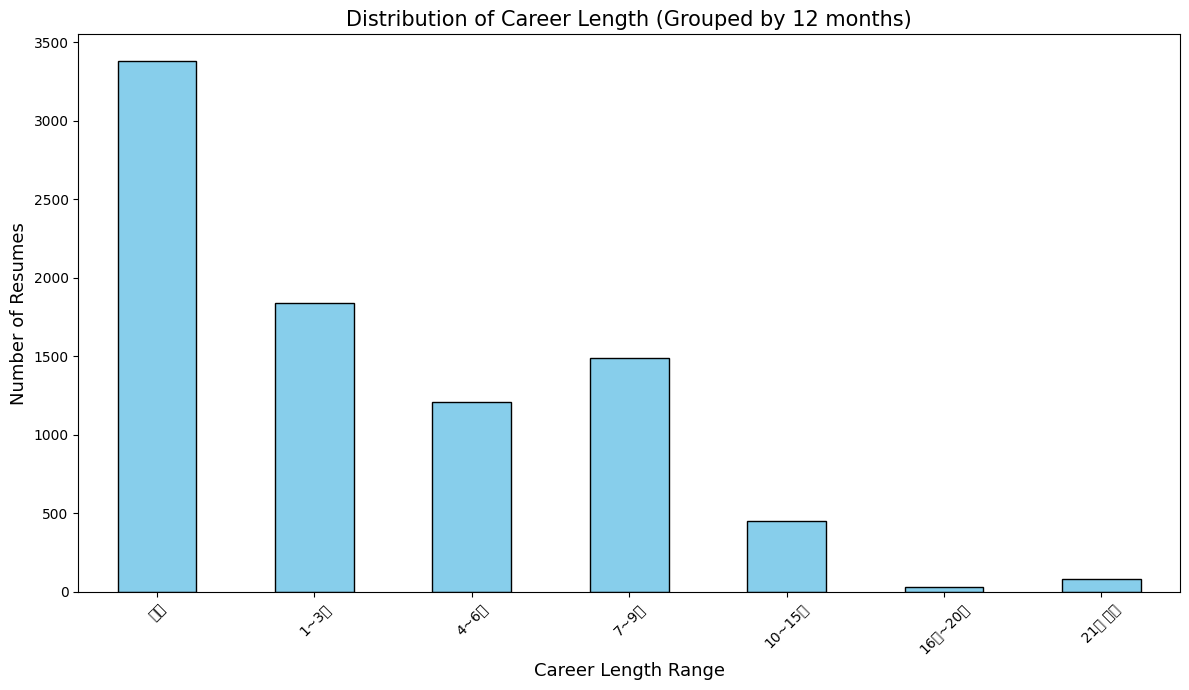

In [ ]:
bins = [-1, 36, 72, 108, 180, 240, 252, float('inf')]
labels = ['신입', '1~3년', '4~6년', '7~9년', '10~15년', '16년~20년', '21년 이상']

# career 새 컬럼 생성 후 범주화 데이터 넣기
resume_all['career'] = pd.cut(resume_all['career_month'], bins=bins, labels=labels)

# 각 범위별 빈도수 확인
career = resume_all['career'].value_counts().sort_index()

# 바 그래프로 시각화
plt.figure(figsize=(12, 7))
career.plot(kind='bar', color='skyblue', edgecolor='black')

# 그래프 설정
plt.title('Distribution of Career Length (Grouped by 12 months)', fontsize=15)
plt.xlabel('Career Length Range', fontsize=13)
plt.ylabel('Number of Resumes', fontsize=13)
plt.xticks(rotation=45)

# 그래프 출력
plt.tight_layout()
plt.show()

In [ ]:
# 각 구간별 인원수 확인
career = resume_all['career'].value_counts().sort_index()
career

신입         3381
1~3년       1838
4~6년       1211
7~9년       1489
10~15년      449
16년~20년      30
21년 이상       84
Name: career, dtype: int64

<career_month를 경력으로 범주화>

- 신입이 3416명으로 가장 많았고
- 1-3년차 1847명, 7-9년차 1492명,
- 4~6년차 1212명, 10-15년차 450명, 16-20년차 30명, 21년이상 84명으로 나타났다.


In [ ]:
resume_all.drop(['career_month'], axis=1, inplace=True)
#['caree_month'] drop -> ['career'] 생성
# career 값 인코딩해줌
resume_all['career'] = resume_all['career'].map({
    '신입': '1',
    '1~3년': '2',
    '4~6년': '3',
    '7~9년': '4',
    '10~15년': '5',
    '16년~20년': '6',
    '21년 이상': '7'})

###인코딩 및 수치형 구간화

resume_part

In [ ]:
resume_all['reg_date'] = resume_all['reg_date'].apply(lambda x: x.split('-')[0])
resume_all['reg_date'] #이력서 등록연도
resume_all['reg_date'].unique()

label_encoder = LabelEncoder()
resume_all['reg_date']= label_encoder.fit_transform(resume_all['reg_date'])


In [ ]:
resume_all['updated_date'] = resume_all['updated_date'].astype(str).str.split('-').str[1]
resume_all['updated_date'] #이력서 수정월
resume_all['updated_date'].unique()

label_encoder = LabelEncoder()
resume_all['updated_date']= label_encoder.fit_transform(resume_all['updated_date'])

In [ ]:
from statistics import mode
for index, row in resume_all.iterrows():
    if row['graduate_date'] != 0:
        resume_all.at[index, 'graduate_date'] = (2023 - row['graduate_date']) // 10
    else:
        mode_value_age = mode(resume_all['graduate_date']) # 졸업연도는 0 이면 우선 최빈값으로 대체
        resume_all.at[index, 'graduate_date'] = mode_value_age

resume_all['graduate_date'].nunique() #일단은 연령대와 유사하게 나눠진 듯? nunique()->6

6

In [ ]:

resume_all['hope_salary'] = resume_all['hope_salary']//1000
resume_all['last_salary'] = resume_all['last_salary']//1000

#연봉 구간화
resume_all['hope_salary'].nunique(),resume_all['last_salary'].nunique() #둘다 최소,최대가 0~10000임 일단은 1000단위로 컷

(11, 11)

In [ ]:
mode_value_careeer_job = resume_all['career_job_code'].mode()[0] #결측치 최빈값 대체
resume_all['career_job_code'].fillna(mode_value_careeer_job, inplace=True)
resume_all['career_job_code'] = resume_all['career_job_code'].apply(lambda x: x.split(';')[0])
categories_to_keep = ['섬유', '디자인', '광고', '도소매', '쇼핑몰']
resume_all['career_job_code'] = resume_all['career_job_code'].apply(lambda x: x if x in categories_to_keep else '기타')
resume_all['career_job_code'].unique()


array(['섬유', '기타', '광고', '도소매', '디자인', '쇼핑몰'], dtype=object)

In [ ]:
resume_all['career_job_code'].nunique(),resume_all['job'].nunique(),resume_all['job_code_seq1'].nunique()

(6, 11, 9)

In [ ]:
label_encoder = LabelEncoder()
resume_all['career_job_code']= label_encoder.fit_transform(resume_all['career_job_code'])
resume_all['job']= label_encoder.fit_transform(resume_all['job'])
# resume_all['job_code_seq1']= label_encoder.fit_transform(resume_all['job_code_seq1'])

education_part

In [ ]:
# label_encoder = LabelEncoder()
labelencode_list = ['hischool_special_type','hischool_gender','hischool_nation']

for column in labelencode_list:
    result = label_encoder.fit_transform(resume_all[column])
    resume_all[column] = result


In [ ]:
resume_all['univ_score'].unique()

array([ 20.        ,  90.        ,  70.        ,  50.        ,
         0.        ,  60.        ,  80.        ,   3.3       ,
         4.5       , 100.        ,  92.        ,   3.1       ,
         3.9       ,  85.5       ,  51.3       ,   3.72      ,
        52.        ,   9.        ,   4.        ,  87.1       ,
         3.2       ,   2.2       ,   0.89      ,  85.        ,
         3.        ,  75.        ,   2.8       ,   3.27      ,
         3.5       ,   7.        ,  84.        ,  40.        ,
         3.32      ,   3.8       ,   3.6       ,  78.        ,
         2.        ,   4.1       ,  81.6       ,   0.807     ,
        80.2       ,   3.7       ,  30.        ,   4.3       ,
        16.        ,  95.        ,   0.80909091,  84.7       ,
        73.        ,  82.5       ,  93.        ,  82.6       ,
        83.        ,  89.        ,  45.        ,  98.        ,
         3.07      ,   5.        ,   2.3       ,  81.8       ,
        15.11      ,   0.86666667,  62.        ,   3.4 

In [ ]:
def encode_score(score):
    if score >= 10:
        if score >= 90:
            return 1
        elif score >= 80:
            return 2
        elif score >=70:
            return 3
        else:
            return 4
    else:
        if score >= 4.0:
            return 1
        elif score >= 3.5:
            return 2
        elif score >= 3.0:
            return 3
        else:
            return 4

resume_all['univ_score'] = resume_all['univ_score'].apply(encode_score)
resume_all['univ_score']

0       4
1       1
2       1
3       3
4       4
       ..
8477    4
8478    4
8479    2
8480    4
8481    2
Name: univ_score, Length: 8482, dtype: int64

In [ ]:

# from sklearn.preprocessing import LabelEncoder


# def encode_scores(df):
#     grouped = df.groupby(['language', 'exam_name'])

#     for (lang, exam), group in grouped:
#         group_size = len(group)
#         bins = [0, 0.1*group_size, 0.2*group_size, 0.3*group_size, 0.4*group_size, 0.5*group_size,
#                 0.6*group_size, 0.7*group_size, 0.8*group_size, 0.9*group_size, group_size]
#         labels = list(range(1, 11))

#         group['rank'] = group['score'].rank(ascending=False)

#         group['group'] = pd.cut(group['rank'], bins=bins, labels=labels, include_lowest=True)

#         df.loc[group.index, 'group'] = group['group']

#     return df

# encode_scores(resume_all)


# le = LabelEncoder()

# labelencode_list = ['hischool_special_type','hischool_gender','hischool_nation']

# for column in labelencode_list:
#     result = le.fit_transform(resume_all[column])
#     resume_all[column] = result

# # drop_list = ['univ_major','univ_sub_major']
# # resume_all = resume_all.drop(columns=drop_list)

# def encode_score(score):
#     if score < 10:
#         return 1
#     else:
#         return score // 10

# resume_all['univ_score'] = resume_all['univ_score'].apply(encode_score)


# mode_value = resume_all['career_job_code'].mode()[0]

# resume_all['career_job_code'].fillna(mode_value, inplace=True)
# resume_all['career_job_code'] = resume_all['career_job_code'].apply(lambda x: x.split(';')[0].split()[0])


# resume_all['career_job_code']= le.fit_transform(resume_all['career_job_code'])



# mode_value = resume_all['text_keyword'].mode()[0]

# resume_all['job_code_seq1']= le.fit_transform(resume_all['job_code_seq1'])
# resume_all['career_month'] = resume_all['career_month'] // 10
# resume_all['updated_date'] = resume_all['updated_date'].astype(str).str.split('-').str[1]
# resume_all['hope_salary'] = resume_all['hope_salary']//2000
# resume_all['last_salary'] = resume_all['last_salary']//2000
# resume_all['graduate_date'] = (2023-resume_all['graduate_date'])//10
# resume_all['graduate_date'] = resume_all['graduate_date'].replace(202, 6)

In [ ]:
resume_all.isnull().sum()

resume_seq                  0
reg_date                    0
updated_date                0
degree                      0
graduate_date               0
hope_salary                 0
last_salary                 0
job_code_seq1               0
career_job_code             0
hischool_type_seq           0
hischool_special_type       0
hischool_nation             0
hischool_gender             0
hischool_location_seq       0
univ_type_seq1              0
univ_type_seq2              0
univ_location               0
univ_major_type             0
univ_score                  0
lang_exam_score          7662
job                         0
text_디자이너                   0
text_상품기획                   0
text_영업기획                   0
text_MD                     0
text_매장영업관리                 0
text_VMD                    0
text_디스플레이                  0
text_머천다이저                  0
text_영업MD                   0
text_여성복                    0
text_마케팅                    0
text_디자인                    0
text_여성복디자

In [ ]:
resume_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8482 entries, 0 to 8481
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   resume_seq             8482 non-null   object  
 1   reg_date               8482 non-null   int64   
 2   updated_date           8482 non-null   int64   
 3   degree                 8482 non-null   int64   
 4   graduate_date          8482 non-null   int64   
 5   hope_salary            8482 non-null   float64 
 6   last_salary            8482 non-null   float64 
 7   job_code_seq1          8482 non-null   object  
 8   career_job_code        8482 non-null   int64   
 9   hischool_type_seq      8482 non-null   int64   
 10  hischool_special_type  8482 non-null   int64   
 11  hischool_nation        8482 non-null   int64   
 12  hischool_gender        8482 non-null   int64   
 13  hischool_location_seq  8482 non-null   int64   
 14  univ_type_seq1         8482 non-null   i

In [ ]:
# 범주형 데이터 -> 라벨인코딩으로 수치형으로 변환
label_encoder = LabelEncoder()
resume_all['career']= label_encoder.fit_transform(resume_all['career'])
# resume_all['language']= label_encoder.fit_transform(resume_all['language'])
# resume_all['score']= label_encoder.fit_transform(resume_all['score'])

## ▶ resume 수치형 data

In [ ]:
resume_all

,resume_seq,reg_date,updated_date,degree,graduate_date,hope_salary,last_salary,job_code_seq1,career_job_code,hischool_type_seq,...,text_의류,text_기획MD,text_여성복디자인,text_패션디자인,text_생산관리,text_거래처관리,text_매장관리,text_패션디자이너,certificate_cnt,career
0,U00001,19,1,4,1,1.0,1.0,재료·화학·섬유·의복,4,21,...,0,0,0,0,0,0,0,0,0,0
1,U00002,20,3,4,1,0.0,0.0,재료·화학·섬유·의복,1,0,...,0,0,0,0,0,0,0,0,1,2
2,U00003,18,6,4,1,0.0,0.0,재료·화학·섬유·의복,4,21,...,0,0,0,0,0,0,0,0,3,3
3,U00004,17,3,4,1,0.0,0.0,재료·화학·섬유·의복,4,21,...,0,0,0,0,0,0,0,0,3,0
4,U00005,20,3,4,1,0.0,0.0,재료·화학·섬유·의복,4,21,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8477,U08478,20,2,4,2,0.0,2.0,재료·화학·섬유·의복,4,21,...,0,0,0,0,0,0,0,0,0,1
8478,U08479,16,6,3,1,2.0,2.0,재료·화학·섬유·의복,3,21,...,0,0,0,0,0,0,0,0,1,1
8479,U08480,19,5,4,1,0.0,0.0,디자인,4,0,...,0,0,1,0,0,0,0,0,4,0
8480,U08481,20,10,4,0,0.0,2.0,재료·화학·섬유·의복,4,21,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
#resume_all = pd.concat([resume_all, resume_job_code], axis=1)

In [ ]:
# index_ignore = True 에서 index=False로 변경함, index를 무시하려는 의도였겠죠?
resume_all.to_csv(csv_path + "/resume_all.csv" , index=False)

### resume 상관관계 분석

- univ_type_seq1   /   univ_type_seq2           0.798516
- career_month     /   last_salary              0.567240

- 최종대학(원)유형코드1, 최종대학(원)유형코드2 0.79로 높은 양의 상관관계를 보임

- 경력월, 최종연봉은 0.57로 양의 상관관계를 보임

In [ ]:
corr = resume_all.corr().unstack().sort_values(ascending=False).drop_duplicates().drop_duplicates()
corr.drop(corr.index[0],inplace=True)
display(corr.head())
display(corr.tail(5))

univ_type_seq2   univ_type_seq1       0.797348
hischool_gender  hischool_type_seq    0.717421
career           graduate_date        0.617340
last_salary      career               0.570692
text_거래처관리       text_매장관리            0.521392
dtype: float64

last_salary  reg_date     -0.252889
text_MD      job          -0.271085
job          text_머천다이저   -0.275084
text_상품기획    job          -0.394282
reg_date     career       -0.448558
dtype: float64

### resume_all 그래프 분석

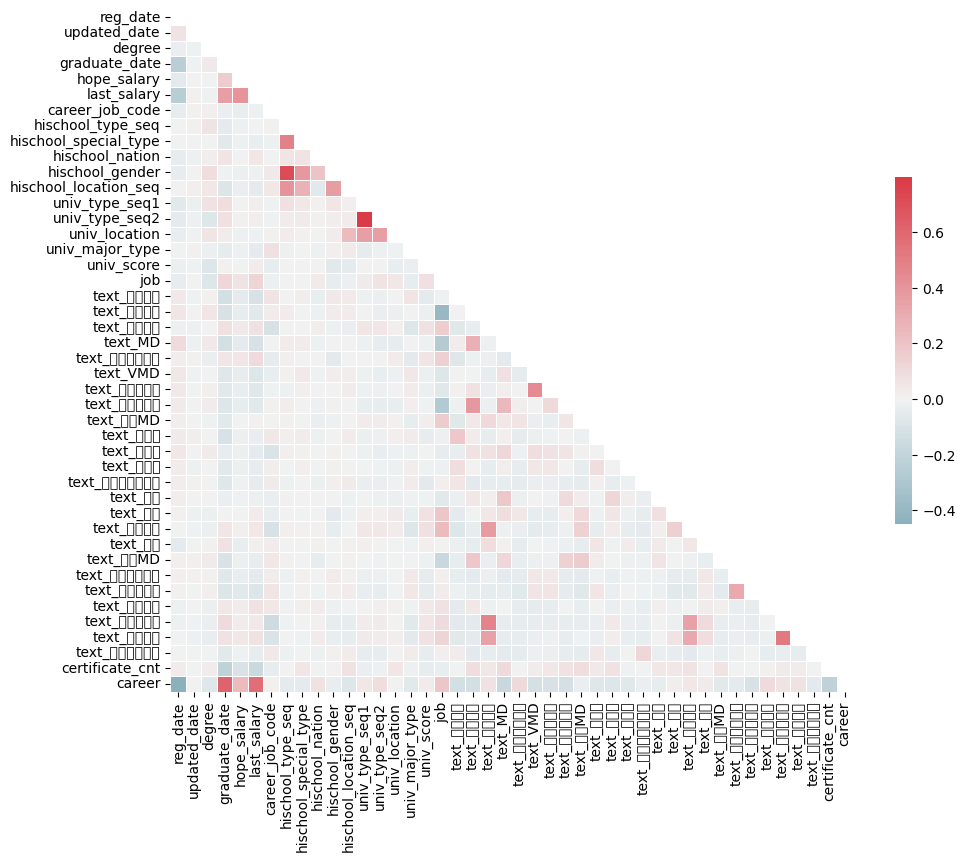

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = resume_all.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

<가설>

```
univ_type_seq1
univ_type_seq2 이 둘은 높은 상관관계를 보임
-> (서울 및 수도권인가?)
```


# 2. Recruitment 데이터 전처리

- address_seq2와 address_seq3는 6000개 이상의 결측치를 가지고 있어 drop 하려고 했지만,
- 상관관계 그래프에서 새로운 가설이 생겨 보류 중이다

In [ ]:
recruitment.isnull().sum()

recruitment_seq         0
address_seq1            1
address_seq2         6595
address_seq3         6686
career_end              0
career_start            0
check_box_keyword       0
education               0
major_task              0
qualifications          0
text_keyword         5988
dtype: int64

In [ ]:
for i in range(len(recruitment)):
    lst=recruitment['check_box_keyword'].iloc[i].split(';')
    for keyword in lst:
        if 'check_box_'+keyword not in recruitment:
            recruitment['check_box_'+keyword] = 0
        recruitment['check_box_'+keyword][i]=1
drop_cols=[]
start_idx= recruitment.columns.get_loc('check_box_2507')
for i in range (start_idx,recruitment.shape[1]):
    count_of_ones = (recruitment.iloc[:,i] == 1).sum()
    # 1의 갯수가 100개 이하이면 drop함 현재 20개 컬럼이 생기는데, 400으로하면 10개만생김
    if count_of_ones < 100:
        drop_cols.append(recruitment.columns[i])

recruitment.drop(drop_cols,axis =1 , inplace=True)

In [ ]:
# ';'을 기준으로 데이터 분할 및 단어 수 카운트 함수
def count_keywords(row):
    keywords = row['check_box_keyword'].split(';')
    return len(keywords)

# 'check_box_keyword' 컬럼의 데이터를 ';'을 기준으로 분할하고 단어 수를 새로운 컬럼에 저장
recruitment['check_box_keyword_cnt'] = recruitment.apply(count_keywords, axis=1)
recruitment

,recruitment_seq,address_seq1,address_seq2,address_seq3,career_end,career_start,check_box_keyword,education,major_task,qualifications,...,check_box_2110,check_box_2302,check_box_2104,check_box_2105,check_box_3008,check_box_3099,check_box_2703,check_box_2299,check_box_2102,check_box_keyword_cnt
0,R02264,3.0,NaN,NaN,0,0,2507;2707;2810,4,8,1,...,0,0,0,0,0,0,0,0,0,3
1,R06317,3.0,NaN,NaN,0,0,2204;2205;2707,3,2,1,...,0,0,0,0,0,0,0,0,0,3
2,R04017,3.0,NaN,NaN,0,0,2101;2108;2201;2707,3,2,1,...,0,0,0,0,0,0,0,0,0,4
3,R02865,3.0,NaN,NaN,0,0,2201;2204;2205;2707,2,2,1,...,0,0,0,0,0,0,0,0,0,4
4,R04890,3.0,NaN,NaN,0,0,2201;2204;2205;2707,2,2,2,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6690,R03678,3.0,NaN,NaN,0,0,2101;2108;2201;2204;2205;2707,3,2,1,...,0,0,0,0,0,0,0,0,0,6
6691,R04593,3.0,NaN,NaN,0,0,2201;2204;2205;2707,4,2,1,...,0,0,0,0,0,0,0,0,0,4
6692,R03252,3.0,NaN,NaN,0,0,2109,3,2,1,...,0,0,0,0,0,0,0,0,0,1
6693,R05130,3.0,NaN,NaN,0,0,2201;2204;2205;2707,2,2,2,...,0,0,0,0,0,0,0,0,0,4


In [ ]:
recruitment['major_task'].unique()

array([ 8,  2,  7,  1, 10,  9,  6])

In [ ]:
recruitment['check_box_keyword'].nunique()

761

## ★recruitment 통합
- recruit_all

In [ ]:
#recruit_all로 파일 통합
recruit_all = pd.merge(recruitment, company, on='recruitment_seq', how='left')

In [ ]:
#오름차순 정리
recruit_all.sort_values(by='recruitment_seq', ascending=True)

,recruitment_seq,address_seq1,address_seq2,address_seq3,career_end,career_start,check_box_keyword,education,major_task,qualifications,...,check_box_2105,check_box_3008,check_box_3099,check_box_2703,check_box_2299,check_box_2102,check_box_keyword_cnt,company_type_seq,supply_kind,employee
4573,R00001,5.0,NaN,NaN,0,0,2101;2108;2201;2204;2205;2707;2810,2,2,1,...,0,0,0,0,0,0,7,5.0,201.0,631.0
5915,R00002,3.0,NaN,NaN,0,0,2507;2703;2707,3,2,1,...,0,0,0,1,0,0,3,2.0,201.0,160.0
6454,R00003,3.0,NaN,NaN,0,0,2101;2108;2201;2707,3,2,2,...,0,0,0,0,0,0,4,NaN,NaN,NaN
5905,R00004,3.0,NaN,NaN,0,0,2507;2707,3,2,1,...,0,0,0,0,0,0,2,2.0,402.0,500.0
4197,R00005,3.0,NaN,NaN,0,0,2507;2707,3,2,1,...,0,0,0,0,0,0,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5983,R06691,3.0,NaN,NaN,0,0,2501;2507;2707,3,2,1,...,0,0,0,0,0,0,3,NaN,NaN,NaN
2367,R06692,3.0,NaN,NaN,0,0,2201;2507,3,2,2,...,0,0,0,0,0,0,2,4.0,402.0,150.0
6235,R06693,5.0,NaN,NaN,0,0,2102;2707,4,2,1,...,0,0,0,0,0,1,2,NaN,NaN,NaN
3298,R06694,3.0,NaN,NaN,0,0,2101;2108;2109;2110;2201;2203;2707,4,2,1,...,0,0,0,0,0,0,7,NaN,NaN,NaN


In [ ]:
recruit_all['company_type_seq'].unique()

array([ 5., nan,  2.,  4.,  9.,  7.,  3.])

### recruit_all 상관관계 분석

In [ ]:
#recruit_all 상관관계 분석
corr = recruit_all.corr().unstack().sort_values(ascending=False).drop_duplicates().drop_duplicates()
corr.drop(corr.index[0],inplace=True)
display(corr.head())
display(corr.tail(5))

check_box_3008  check_box_3099    0.959963
check_box_2204  check_box_2205    0.914608
check_box_2104  check_box_2105    0.867958
check_box_3008  check_box_2105    0.833339
check_box_3099  check_box_2105    0.799975
dtype: float64

check_box_2507  check_box_2205   -0.521667
                check_box_2201   -0.593952
address_seq1    address_seq3     -0.791208
education       address_seq3     -0.843788
address_seq1    career_end             NaN
dtype: float64

- <recruit_all 상관관계 분석>
- 1) education       address_seq3   -0.843788 음의 상관관계를 보이고 있다
- -> address_seq3은 '지방'일까?

In [ ]:
recruit_all.isnull().sum()

recruitment_seq             0
address_seq1                1
address_seq2             6595
address_seq3             6686
career_end                  0
career_start                0
check_box_keyword           0
education                   0
major_task                  0
qualifications              0
text_keyword             5988
check_box_2507              0
check_box_2707              0
check_box_2810              0
check_box_2204              0
check_box_2205              0
check_box_2101              0
check_box_2108              0
check_box_2201              0
check_box_2501              0
check_box_2203              0
check_box_2109              0
check_box_2110              0
check_box_2302              0
check_box_2104              0
check_box_2105              0
check_box_3008              0
check_box_3099              0
check_box_2703              0
check_box_2299              0
check_box_2102              0
check_box_keyword_cnt       0
company_type_seq         4318
supply_kin

- recruitment + company 통합하니 company 널값이 4318개가 나옴 -> 따로 봐야 하나..?

### company_size 컬럼 생성

In [ ]:
# company_size 컬럼 생성
recruit_all['company_size'] = pd.cut(recruit_all['employee'],
    bins=[-1, 50, 300, 1000, float('inf')],
    labels=['소기업', '중소기업', '중견기업', '대기업'])

In [ ]:
sns.displot(recruit_all, x="company_size")

In [ ]:
recruit_all['company_size'].value_counts()

- 중소기업의 수가 1223개로 가장 많다.
- 중소기업 > 소기업 > 중견기업 > 대기업 순이다
- 기업 규모별 count는 위의 결과값 참고

In [ ]:
#last_salary 와 career_month 상관관계 분석 -> 하려면 우선 career_month 구간화 작업 먼저!

In [ ]:
recruitment.corr()

,address_seq1,address_seq2,address_seq3,career_end,career_start,education,major_task,qualifications,check_box_2507,check_box_2707,...,check_box_2110,check_box_2302,check_box_2104,check_box_2105,check_box_3008,check_box_3099,check_box_2703,check_box_2299,check_box_2102,check_box_keyword_cnt
address_seq1,1.000000,-0.095073,-0.791208,NaN,NaN,0.018978,0.002438,-0.008282,0.013610,-0.033999,...,-0.001960,0.000219,-0.012824,-0.011962,-0.011707,-0.010892,-0.005658,0.009858,-0.004445,-0.005768
address_seq2,-0.095073,1.000000,0.251298,NaN,NaN,-0.321367,-0.039586,0.332134,0.031445,0.006263,...,0.184234,-0.039586,0.089252,-0.039586,-0.039586,NaN,0.333401,0.089252,-0.069268,0.257116
address_seq3,-0.791208,0.251298,1.000000,NaN,NaN,-0.843788,NaN,-0.446121,-0.259412,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006292
career_end,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
career_start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,0.018978,-0.321367,-0.843788,NaN,NaN,1.000000,0.027816,-0.104869,-0.007093,-0.031803,...,0.077305,-0.011214,0.011602,0.020003,0.023757,0.018855,0.001518,0.000408,0.018303,-0.013668
major_task,0.002438,-0.039586,NaN,NaN,NaN,0.027816,1.000000,-0.015535,0.109611,-0.021608,...,-0.039542,-0.020111,0.012813,0.017760,0.016064,0.019346,0.096671,-0.028473,-0.018363,-0.094482
qualifications,-0.008282,0.332134,-0.446121,NaN,NaN,-0.104869,-0.015535,1.000000,0.007913,-0.017004,...,0.011083,0.030967,0.012048,0.009549,0.003485,0.006977,0.027318,0.010066,0.029247,0.056667
check_box_2507,0.013610,0.031445,-0.259412,NaN,NaN,-0.007093,0.109611,0.007913,1.000000,-0.076505,...,-0.091920,-0.013397,-0.051214,-0.087674,-0.084182,-0.081478,0.202367,-0.025696,-0.064108,-0.356050
check_box_2707,-0.033999,0.006263,NaN,NaN,NaN,-0.031803,-0.021608,-0.017004,-0.076505,1.000000,...,-0.130498,-0.089972,-0.062648,-0.022363,0.041971,0.040290,0.039010,-0.072534,-0.120936,0.114016


In [ ]:
# resume_all['career_month']

In [ ]:
# #last_salary 와 career_month 상관관계 그래프 그려보기

# import seaborn as sns

# sns.set_theme(style="darkgrid")

# resume_all = pd.read_csv("/content/drive/MyDrive/dev/DACON/1. 국민대/resume.csv")

# sns.relplot(data=resume_all, x="career_month", y="last_salary", hue="hope_salary")

- <last_salary 와 career_month 상관관계 분석>
- 전체 인원의 최종 연봉은 2000만원 ~ 4000만원 구간이 가장 많다.

### check_box_keyword_1 피처 생성
- recruitment 데이터 중 check_box_keyword (모집직무코드)를 분석해
- 지원자가 지원한 직무 유사도 분석을 위함
- 세미콜론 기준 맨 앞 번호만 따서 새로운 피처 생성

In [ ]:
# check_box_keyword_1 피처 생성
recruit_all['check_box_keyword_1']=recruit_all['check_box_keyword'].str.split(';').str[0]
recruit_all

,recruitment_seq,address_seq1,address_seq2,address_seq3,career_end,career_start,check_box_keyword,education,major_task,qualifications,...,check_box_3099,check_box_2703,check_box_2299,check_box_2102,check_box_keyword_cnt,company_type_seq,supply_kind,employee,company_size,check_box_keyword_1
0,R02264,3.0,NaN,NaN,0,0,2507;2707;2810,4,8,1,...,0,0,0,0,3,5.0,402.0,800.0,중견기업,2507
1,R06317,3.0,NaN,NaN,0,0,2204;2205;2707,3,2,1,...,0,0,0,0,3,NaN,NaN,NaN,NaN,2204
2,R04017,3.0,NaN,NaN,0,0,2101;2108;2201;2707,3,2,1,...,0,0,0,0,4,NaN,NaN,NaN,NaN,2101
3,R02865,3.0,NaN,NaN,0,0,2201;2204;2205;2707,2,2,1,...,0,0,0,0,4,NaN,NaN,NaN,NaN,2201
4,R04890,3.0,NaN,NaN,0,0,2201;2204;2205;2707,2,2,2,...,0,0,0,0,4,NaN,NaN,NaN,NaN,2201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6690,R03678,3.0,NaN,NaN,0,0,2101;2108;2201;2204;2205;2707,3,2,1,...,0,0,0,0,6,NaN,NaN,NaN,NaN,2101
6691,R04593,3.0,NaN,NaN,0,0,2201;2204;2205;2707,4,2,1,...,0,0,0,0,4,NaN,NaN,NaN,NaN,2201
6692,R03252,3.0,NaN,NaN,0,0,2109,3,2,1,...,0,0,0,0,1,4.0,402.0,525.0,중견기업,2109
6693,R05130,3.0,NaN,NaN,0,0,2201;2204;2205;2707,2,2,2,...,0,0,0,0,4,2.0,402.0,40.0,소기업,2201


### recruit_code 피처 생성

In [ ]:
# check_box_keyword_1을 '직무'로 카테고리화
recruit_all['recruit_code'] = ''
recruit_all.loc[recruit_all['check_box_keyword_1'] == '2101', 'recruit_code'] = 'MD'
recruit_all.loc[recruit_all['check_box_keyword_1'] == '2507', 'recruit_code'] = '디자이너'
recruit_all.loc[recruit_all['check_box_keyword_1'] == '2201', 'recruit_code'] = '영업 및 관리'
recruit_all.loc[recruit_all['check_box_keyword_1'] == '2204', 'recruit_code'] = 'VMD'
recruit_all

In [ ]:
# '기타' 추가
recruit_all['recruit_code'] = recruit_all['check_box_keyword_1'].map({
    '2101': 'MD',
    '2507': '디자이너',
    '2201': '영업 및 관리',
    '2204': 'VMD'
}).fillna('기타')

recruit_all

6695개의 recruit_all 데이터 중 '기타'값 1133개로 추가 분류 예정

In [ ]:
len(recruit_all[recruit_all['recruit_code'] == '기타'])

### recruit_all 결측치 정리
- 널값은 0으로 치환

In [ ]:
recruit_all

In [ ]:
## 범주형 -> 수치형 변환 (company_size, recruit_code)

from sklearn.preprocessing import LabelEncoder

# LabelEncoder 초기화
le = LabelEncoder()

# 'company_size' 컬럼 변환
le.fit(recruit_all['company_size'])
recruit_all['company_size'] = le.transform(recruit_all['company_size'])

# 'recruit_code' 컬럼 변환
le.fit(recruit_all['recruit_code'])
recruit_all['recruit_code'] = le.transform(recruit_all['recruit_code'])
recruit_all

In [ ]:
# 공통된 결측치 제거 (check_box_keyword,check_box_keyword_1 )

recruit_all = recruit_all.drop(['check_box_keyword', 'check_box_keyword_1'], axis=1)
recruit_all.info

In [ ]:


# 널값 0으로 다 치환하기 (address_se1, address_se2, address_se3)

import pandas as pd

# 'address_seq2' 및 'address_seq3' 열의 결측치를 0으로 채우기
recruit_all['address_seq1'].fillna(0, inplace=True)
recruit_all['address_seq2'].fillna(0, inplace=True)
recruit_all['address_seq3'].fillna(0, inplace=True)
recruit_all['company_type_seq'].fillna(0, inplace=True)
recruit_all['supply_kind'].fillna(0.0, inplace=True)
recruit_all['employee'].fillna(0.0, inplace=True)
recruit_all

In [ ]:
recruit_all['text_keyword']

In [ ]:
#text_keyword 범주형 데이터 세부분류 필요
#1.세미콜론 기준을 앞단어만 추출
#2.label encoding으로 수치형으로 범주화? or 데이터 너무 복잡하면 직접 분류 후 수치형 변환 예정

# "text_keyword" 컬럼에서 세미콜론 앞의 첫 번째 단어 추출하여 "job_detail" 컬럼 생성
data=recruit_all
jobrecruit_all = pd.DataFrame(data)

# "text_keyword" 컬럼에서 세미콜론 앞의 첫 번째 단어 추출하여 "job" 컬럼 생성
recruit_all['job_detail'] = recruit_all['text_keyword'].str.split(';').str[0]

In [ ]:
recruit_all['job_detail']
job_detail_data = recruit_all['job_detail'].dropna()
job_detail_data.head(170)

In [ ]:
job_dic = {
    '디자이너': ['디자이너', '디자인','여성복','남성복','아동복','의류','막내'],
    'MD':['상품기획','MD','기획','전략'],
    'VMD':['VMD','디스플레이'],
    '생산관리':['거래처','물류','소싱','생산'],
    '경영관리' : ['경영','인사','회계'],
    'TD':['TD','패턴','테크','패턴'],
    '마케팅':['홍보','마케팅'],
    '영업':['영업','거래처'],
    '매장관리':['백화점','판매','매장'],
    '기타':['None']}

In [ ]:
def addD(x):
  result = 'None'
  for k in job_dic.keys():
    for s in job_dic[k]:
        if s in str(x):      #  ['디자이너', '디자인']
            result =k   # 디자이너
            break
  return result

recruit_all['text_keyword'] = recruit_all.apply(lambda x: addD(x['text_keyword']),axis=1)

In [ ]:
a= '산업디자이너'
#a in job_dick['디자이너']
'디자이너' in  a
# a in '디자이너' 가 아닌 위처럼 설정해야함

In [ ]:
recruit_all['text_keyword'].value_counts()

In [ ]:
recruit_all.isnull().sum()

In [ ]:
# text_keyword 라벨 인코딩으로 수치형 변환

from sklearn.preprocessing import LabelEncoder

# 널값을 "Unknown"으로 대체
recruit_all['text_keyword'].fillna("Unknown", inplace=True)

# ' text_keyword' 컬럼 변환
le.fit(recruit_all['text_keyword'])
recruit_all['text_keyword'] = le.transform(recruit_all['text_keyword'])
recruit_all

In [ ]:
#recruit_all.nunique()
resume_all.nunique()

In [ ]:
recruit_all['major_task'].value_counts()
#address_seq1 recruit_code education qualifications text_keyword company_size major_task

In [ ]:
recruit_all.isnull().sum()

## ▶ recruitment 수치형 data

In [ ]:
# 새로운 컬럼 생성한 그룹은 drop (job_detail)

recruit_all = recruit_all.drop(['job_detail'], axis=1)
recruit_all.sort_values(by='recruitment_seq', inplace = True)
recruit_all.isnull().sum()


In [ ]:
recruit_all

In [ ]:
# 모델이 있는 노트에서 다시 read_csv 하기 위해 출려
recruit_all.to_csv(csv_path + "/recruit_all.csv" , index = False)